In [18]:
from builtins import range, print
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [19]:
# Generate data
np.random.seed(0)
n_samples = 100000
x = np.linspace(0, 4 * np.pi, n_samples)
y_true = np.sin(x)
noise = 0.5 * np.random.randn(n_samples)
y_noisy = y_true + noise

In [20]:
# Prepare polynomial features manually
degree = 15
X = x.reshape(-1, 1)
X_poly = np.hstack([X**i for i in range(degree + 1)]) 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_poly, y_noisy, test_size=0.2, random_state=42)

In [22]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge (alpha=100)": Ridge(alpha=100),
    "Lasso (alpha=100)": Lasso(alpha=100, max_iter=10000),
    "ElasticNet (alpha=100)": ElasticNet(alpha=100, max_iter=10000)
}

---Linear Regression---
Fit time: 0.0479 s
Predict (train) time: 0.0047 s
Predict (test) time: 0.0008 s
Train R²: 0.3335  | Test R²: 0.3362


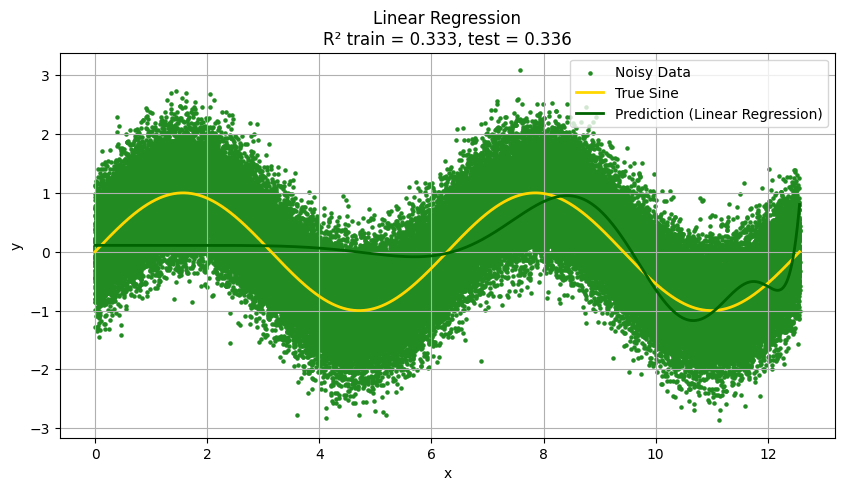

---Ridge (alpha=100)---
Fit time: 0.0856 s
Predict (train) time: 0.0026 s
Predict (test) time: 0.0009 s
Train R²: 0.6384  | Test R²: 0.6461


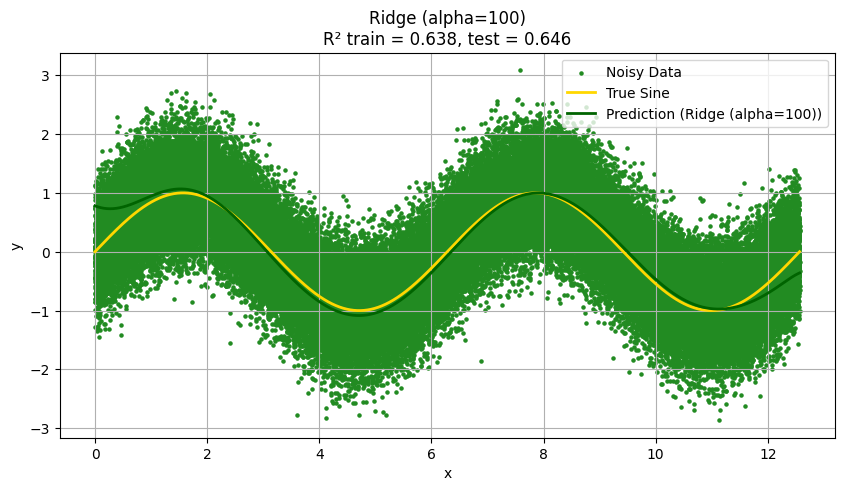

C:\Users\bpservice.ir\AdvancePy\Maedeh_Mehry\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.351e+04, tolerance: 5.957e+00
  model = cd_fast.enet_coordinate_descent(


---Lasso (alpha=100)---
Fit time: 14.8944 s
Predict (train) time: 0.0022 s
Predict (test) time: 0.0006 s
Train R²: 0.2211  | Test R²: 0.2227


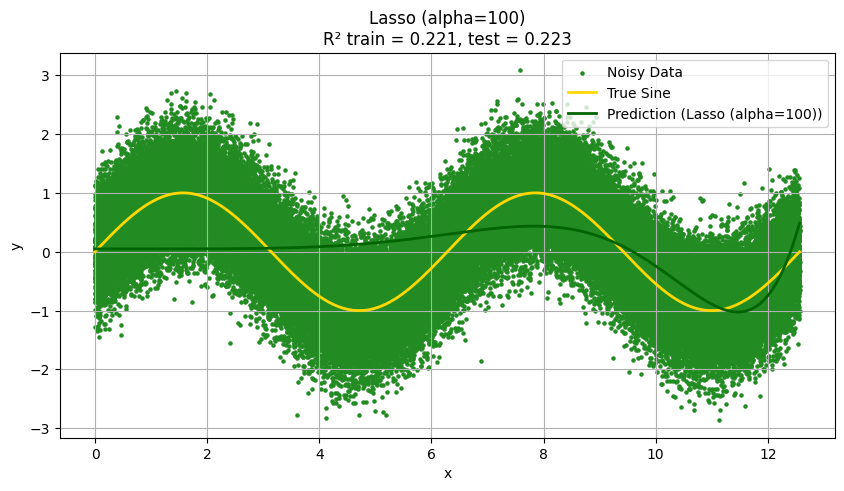

C:\Users\bpservice.ir\AdvancePy\Maedeh_Mehry\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+04, tolerance: 5.957e+00
  model = cd_fast.enet_coordinate_descent(


---ElasticNet (alpha=100)---
Fit time: 15.1021 s
Predict (train) time: 0.0020 s
Predict (test) time: 0.0007 s
Train R²: 0.2190  | Test R²: 0.2204


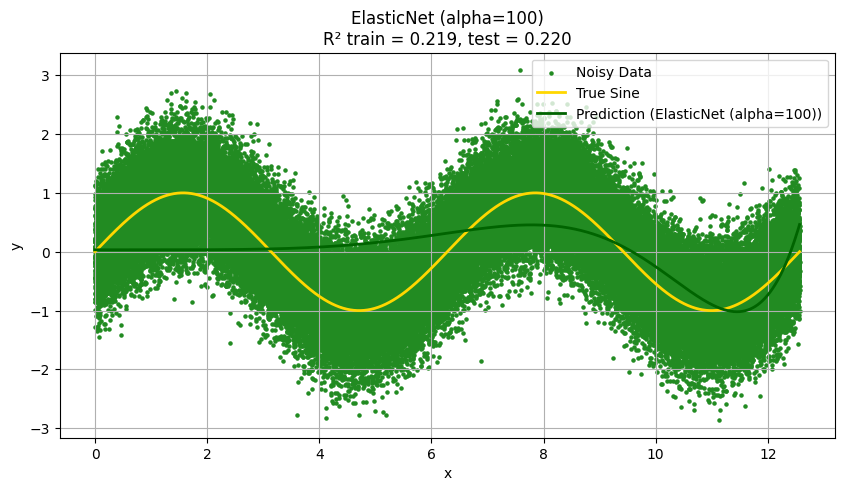

In [23]:
# Fit and plot each model
for name, model in models.items():
    t0 = time.perf_counter()
    model.fit(x_train, y_train)
    fit_time = time.perf_counter() - t0

    t1 = time.perf_counter()
    y_pred_train = model.predict(x_train)
    predict_train_time = time.perf_counter() - t1

    t2 = time.perf_counter()
    y_pred_test = model.predict(x_test)
    predict_test_time = time.perf_counter() - t2

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"---{name}---")
    print(f"Fit time: {fit_time:.4f} s")
    print(f"Predict (train) time: {predict_train_time:.4f} s")
    print(f"Predict (test) time: {predict_test_time:.4f} s")
    print(f"Train R²: {train_r2:.4f}  | Test R²: {test_r2:.4f}")

    plt.figure(figsize=(10, 5))
    plt.scatter(x, y_noisy, s=5, label="Noisy Data", color ='forestgreen')
    plt.plot(x, y_true, color ='gold', label="True Sine", linewidth=2)
    plt.plot(x, model.predict(X_poly), color ='darkgreen', label=f"Prediction ({name})", linewidth=2)
    plt.title(f"{name}\nR² train = {train_r2:.3f}, test = {test_r2:.3f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()